# Biodiversity Study

## Introduction
With goals yet to define, we set up our analysis environment and have a first look at our data to gradually set our questions.

### Questions by Codecademy

- What is the distribution of conservation_status for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


## Exploring the data

###### species

In [5]:
f"number of species: {species.scientific_name.nunique()}"

'number of species: 5541'

In [6]:
print(f"number of categories: {species.category.nunique()}")
print(f"categories: {species.category.unique()}")

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [7]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [8]:
print(f"number of conservation statuses: {species.conservation_status.nunique()}")
print(f"unique conservation statuses: {species.conservation_status.unique()}")

number of conservation statuses: 4
unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [9]:
print(f"na values:{species.conservation_status.isna().sum()}")

print(species.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


##### observations

In [10]:
print(f"total parks: {observations.park_name.nunique()}")

total parks: 4


In [11]:
print(f"parks: {observations.park_name.unique()}")

parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [12]:
print(f"number of observations: {observations.observations.sum()}")

number of observations: 3314739


## Analysis

In [13]:
species.fillna('Safe', inplace=True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Safe                  5633
Species of Concern     161
Threatened              10
dtype: int64

In [14]:
conservationCategory = species[species.conservation_status != 'Safe'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

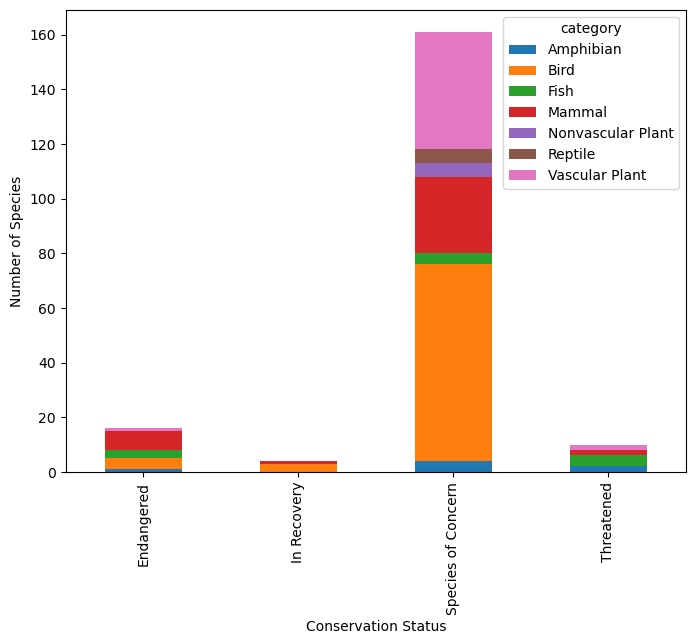

In [15]:
ax = conservationCategory.plot(kind='bar', figsize=(8,6), stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

#### In conservation

The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `Safe`. 

In [44]:
species['is_safe'] = species.conservation_status == 'Safe'
species

,category,scientific_name,common_names,conservation_status,is_safe,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe,True,False
1,Mammal,Bos bison,"American Bison, Bison",Safe,True,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Safe,True,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Safe,True,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Safe,True,False
...,...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,Safe,True,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",Safe,True,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",Safe,True,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Safe,True,False


In [45]:
category_counts = species.groupby(['category', 'is_safe']).scientific_name.nunique().reset_index().pivot(columns='is_safe', index='category', values='scientific_name').reset_index()

category_counts.columns = ['category', 'not_safe', 'safe']

category_counts

,category,not_safe,safe
0,Amphibian,7,72
1,Bird,75,413
2,Fish,11,115
3,Mammal,30,146
4,Nonvascular Plant,5,328
5,Reptile,5,73
6,Vascular Plant,46,4216


In [46]:
category_counts['perc_not_safe'] = category_counts.not_safe / (category_counts.safe + category_counts.not_safe) * 100

category_counts

,category,not_safe,safe,perc_not_safe
0,Amphibian,7,72,8.860759
1,Bird,75,413,15.368852
2,Fish,11,115,8.730159
3,Mammal,30,146,17.045455
4,Nonvascular Plant,5,328,1.501502
5,Reptile,5,73,6.410256
6,Vascular Plant,46,4216,1.079305


Contingency between Mammal and Bird

In [47]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

Contingency between Mammal and Reptile

In [48]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

#### Species in parks

In [49]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = species[species.category == 'Mammal'].common_names.apply(remove_punctuations).str.split().tolist()
common_names [:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [50]:
cleanRows = []

for item in common_names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [51]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [52]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
129,Bat,23
173,Shrew,18
119,Myotis,17
6,Mouse,16
124,Chipmunk,13
196,Squirrel,12
145,American,12
101,Vole,11
73,Eastern,11
114,Mountain,10


In [53]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_safe,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe,True,False
1,Mammal,Bos bison,"American Bison, Bison",Safe,True,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Safe,True,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Safe,True,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Safe,True,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Safe,True,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Safe,True,False
7,Mammal,Canis latrans,Coyote,Species of Concern,False,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,False,False
9,Mammal,Canis rufus,Red Wolf,Endangered,False,False


In [54]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_safe,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,Safe,True,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,False,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,False,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",Safe,True,True
32,Mammal,Lasiurus cinereus,Hoary Bat,Safe,True,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,False,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,False,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,False,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,False,True
40,Mammal,Nycticeius humeralis,Evening Bat,Safe,True,True


In [55]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_safe,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,False,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,False,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,False,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,False,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,Safe,True,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,False,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,False,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,False,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,False,True


In [56]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [57]:
obs_by_park = bat_observations.groupby(['park_name','is_safe']).observations.sum().reset_index()
obs_by_park

,park_name,is_safe,observations
0,Bryce National Park,False,1837
1,Bryce National Park,True,1596
2,Great Smoky Mountains National Park,False,1112
3,Great Smoky Mountains National Park,True,1299
4,Yellowstone National Park,False,4318
5,Yellowstone National Park,True,4044
6,Yosemite National Park,False,2441
7,Yosemite National Park,True,2345


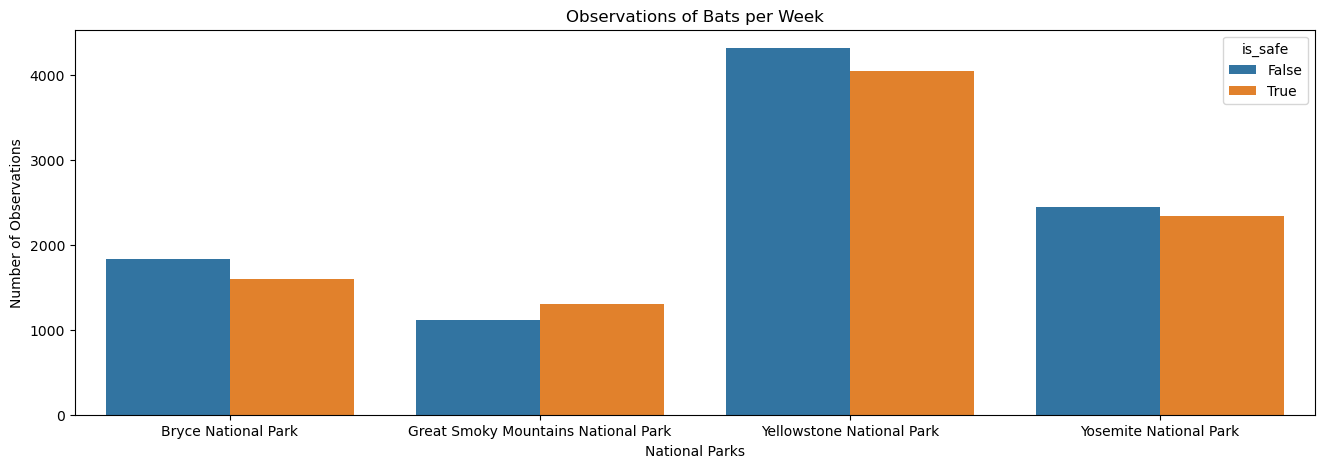

<Figure size 640x480 with 0 Axes>

In [58]:
plt.figure(figsize=(16,5))
ax = plt.subplot()
sns.barplot(x=obs_by_park.park_name, y=obs_by_park.observations, hue=obs_by_park.is_safe)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()
plt.clf()

## Codecademy Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.